<a href="https://colab.research.google.com/github/AswinSamay9866/ML-Project/blob/main/Forecast_Bike_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Info

In [ ]:
'''Welcome to this project on the Forecasting Bike Rentals with DecisionTreeRegressor, LinearRegression, RandomForestRegressor using scikit-learn.
 In this project, you will use Python and scikit-learn to build models using the above-mentioned algorithms, and apply them to forecast the bike rentals.
Forecasting is a regression problem, which is a highly demanded skill in the real world. This exercise enables you to understand the basic workflow to 
solve a regression problem, which includes data preprocessing and data modeling steps. You will understand how Pandas and scikit-learn, 
in association with Python, could be used to solve a machine learning problem end-to-end project.'''

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import os
np.random.seed(42)


In [ ]:
filePath = "/content/drive/MyDrive/Project Data files/bike rental data/hour.csv"
bikesData = pd.read_csv(filePath)
bikesData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bikesData.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bikesData.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [ ]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']

bikesData = bikesData.drop(columnsToDrop, axis = 1)
bikesData.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8
9,1,0,1,9,0,6,0,1,0.32,0.76,0.0000,14


In [ ]:
from sklearn.model_selection import train_test_split
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

12165 train + 5214 test


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
columnsToScale = ["temp","hum","windspeed"]
scaler = StandardScaler()
train_set[columnsToScale]=scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
train_set[columnsToScale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,-1.869081e-17,2.371396e-16,1.401811e-16
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
trainingCols = train_set.drop(['cnt'], axis =1)
trainingLabels = train_set['cnt']

In [ ]:
dec_reg = DecisionTreeRegressor(random_state= 42)
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(dt_mse_scores)


Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572
Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [ ]:
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv =10,scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv =10,scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942329
Standard deviation: 31.426965705295242
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181867
Standard deviation: 37.55565075919533


In [ ]:
forest_reg = RandomForestRegressor()
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv =10,scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv =10,scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [33.3863599  32.62563681 29.03667214 31.68005752 36.36364832 58.12479441
 40.82787829 41.53359375 37.69944079 84.45818257]
Mean: 42.573626449449684
Standard deviation: 15.962120865411569
Scores: [ 47.57071655  52.28361121  44.20071664  52.3497312   60.71999839
  94.09382903  66.51736101  66.02795389  60.68548962 134.79396817]
Mean: 67.92433756953
Standard deviation: 25.94330321988309


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},]
grid_search = GridSearchCV(forest_reg,param_grid,cv = 5, scoring = 'neg_mean_squared_error')

In [ ]:
grid_search.fit(trainingCols,trainingLabels)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(max_depth=28, max_features=10, n_estimators=120)
{'max_depth': 28, 'max_features': 10, 'n_estimators': 120}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00506077 0.00463056 0.00573747 0.57641289 0.00205046 0.01775569
 0.0729443  0.016771   0.09549576 0.03463266 0.00944615 0.15906227]


In [ ]:

final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)

X_test = test_set.drop(['cnt'], axis=1)
y_test = test_set['cnt']

In [ ]:
predictedCounts_test = final_model.predict(X_test)
mse = mean_squared_error(y_test,predictedCounts_test)
final_mse = np.sqrt(mse)
print(final_mse)

test_set.describe()


39.27952295519045


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.018492,-0.004197,0.017498,185.322785,360.850898
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.990859,0.993451,1.008611,177.755171,207.769276
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000,-3.245965,-1.552670,1.000000,0.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.818629,-0.762886,-0.696254,41.000000,180.781250
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.010056,0.013076,0.037231,136.000000,362.375000
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.735156,0.789038,0.526495,277.000000,537.104167
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.392526,1.927116,5.419128,977.000000,724.041667


In [ ]:
pred_set = X_test
pred_set['predictedCounts_test'] = predictedCounts_test

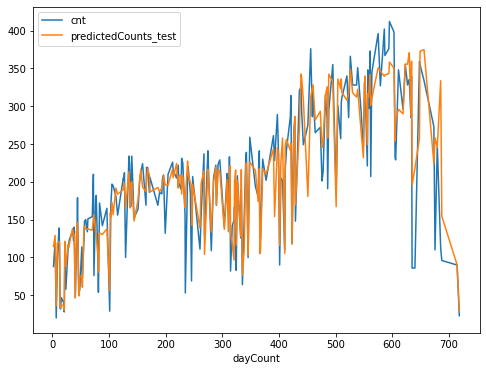

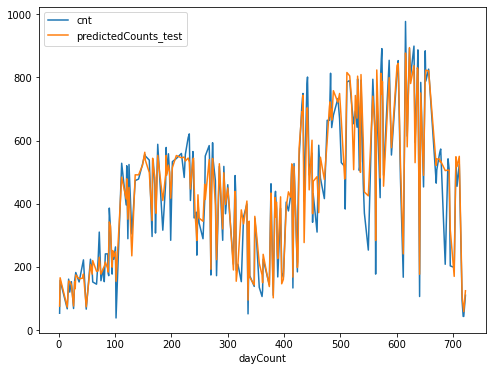

In [ ]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    pred_set_freg_time = pred_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    pred_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()